In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
from urllib.error import HTTPError
from urllib.error import URLError
import pandas as pd

In [16]:
url = 'https://www.imdb.com/title/tt4154756/reviews?ref_=tt_ql_3'
try:
    html = urlopen(url)
except HTTPError as he:
    print('http error')
except URLError as us:
    print('url error')
else:
    soup = BeautifulSoup(html.read(),'html.parser', from_encoding='UTF-8')

 - 점수(별점), 리뷰제목, 작성자 닉네임, 작성날짜, 리뷰내용

In [24]:
reivew_list= soup.find_all('div',{'class':'imdb-user-review'})

In [25]:
reivew_list

[<div class="lister-item mode-detail imdb-user-review collapsable" data-review-id="rw5504583" data-vote-url="/title/tt4154756/review/rw5504583/vote/interesting">
 <div class="review-container">
 <div class="lister-item-content">
 <div class="ipl-ratings-bar">
 <span class="rating-other-user-rating">
 <svg class="ipl-icon ipl-star-icon " fill="#000000" height="24" viewbox="0 0 24 24" width="24" xmlns="http://www.w3.org/2000/svg">
 <path d="M0 0h24v24H0z" fill="none"></path>
 <path d="M12 17.27L18.18 21l-1.64-7.03L22 9.24l-7.19-.61L12 2 9.19 8.63 2 9.24l5.46 4.73L5.82 21z"></path>
 <path d="M0 0h24v24H0z" fill="none"></path>
 </svg>
 <span>9</span><span class="point-scale">/10</span>
 </span>
 </div>
 <a class="title" href="/review/rw5504583/"> Great
 </a> <div class="display-name-date">
 <span class="display-name-link"><a href="/user/ur87850731/">MR_Heraclius</a></span><span class="review-date">23 February 2020</span>
 </div>
 <div class="content">
 <div class="text show-more__control">

In [65]:
soup.find_all('a','title')[0].get_text()

' Great\n'

# 자연어 처리 기초
- 꼬고마
- 

In [27]:
from konlpy.tag import Kkma

In [28]:
kkoma = Kkma()

C:\Users\hwang in beom\Anaconda3\lib\site-packages\jpype\_core.py:217: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [29]:
kkoma.nouns('한국어 문장 분석을 시작합니다. 재미있어요~~')

['한국어', '문장', '분석']

In [30]:
kkoma.pos('한국어 문장 분석을 시작합니다. 재미있어요~~')

[('한국어', 'NNG'),
 ('문장', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('시작하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('.', 'SF'),
 ('재미있', 'VA'),
 ('어요', 'EFN'),
 ('~~', 'SW')]

- 워드클라우드

In [32]:
from wordcloud import WordCloud, STOPWORDS

In [34]:
import numpy as np
from PIL import Image

In [37]:
text = open("../image/07. alice.txt").read()

In [39]:
text

'癤풮roject Gutenberg\'s Alice\'s Adventures in Wonderland, by Lewis Carroll\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: Alice\'s Adventures in Wonderland\n\nAuthor: Lewis Carroll\n\nPosting Date: June 25, 2008 [EBook #11]\nRelease Date: March, 1994\n[Last updated: December 20, 2011]\n\nLanguage: English\n\n\n*** START OF THIS PROJECT GUTENBERG EBOOK ALICE\'S ADVENTURES IN WONDERLAND ***\n\n\n\n\n\n\n\n\n\n\nALICE\'S ADVENTURES IN WONDERLAND\n\nLewis Carroll\n\nTHE MILLENNIUM FULCRUM EDITION 3.0\n\n\n\n\nCHAPTER I. Down the Rabbit-Hole\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or conversations in\nit, \'and what i

In [40]:
alice_mask = np.array(Image.open('../image/07. alice_mask.png'))

In [41]:
alice_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

    

<function matplotlib.pyplot.show(*args, **kw)>

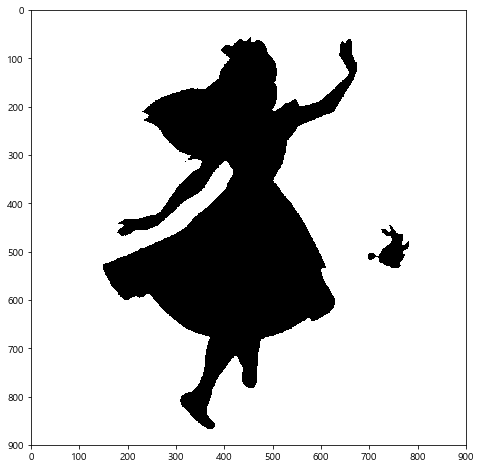

In [50]:
# 엘리스 그림 모양
plt.figure(figsize=(8,8))
plt.imshow(alice_mask, cmap=plt.cm.gray)
plt.show

In [45]:
sw = set(STOPWORDS)
sw.add('said')

In [46]:
wc = WordCloud(background_color='white', max_words=2000,mask=alice_mask,stopwords=sw)

In [47]:
wc = wc.generate(text)
wc.words_

{'Alice': 1.0,
 'little': 0.29508196721311475,
 'one': 0.27595628415300544,
 'know': 0.2459016393442623,
 'went': 0.226775956284153,
 'thing': 0.2185792349726776,
 'time': 0.2103825136612022,
 'Queen': 0.20765027322404372,
 'see': 0.1830601092896175,
 'King': 0.17486338797814208,
 'well': 0.1721311475409836,
 'now': 0.16393442622950818,
 'head': 0.16393442622950818,
 'began': 0.15846994535519127,
 'way': 0.1557377049180328,
 'Hatter': 0.1557377049180328,
 'Mock Turtle': 0.15300546448087432,
 'say': 0.15027322404371585,
 'Gryphon': 0.15027322404371585,
 'think': 0.1448087431693989,
 'quite': 0.14207650273224043,
 'much': 0.13934426229508196,
 'first': 0.13934426229508196,
 'thought': 0.1366120218579235,
 'go': 0.1366120218579235,
 'come': 0.13114754098360656,
 'never': 0.1284153005464481,
 'voice': 0.12568306010928962,
 'looked': 0.12295081967213115,
 'got': 0.12295081967213115,
 'must': 0.12021857923497267,
 'Cat': 0.12021857923497267,
 'Mouse': 0.12021857923497267,
 'Duchess': 0.11475

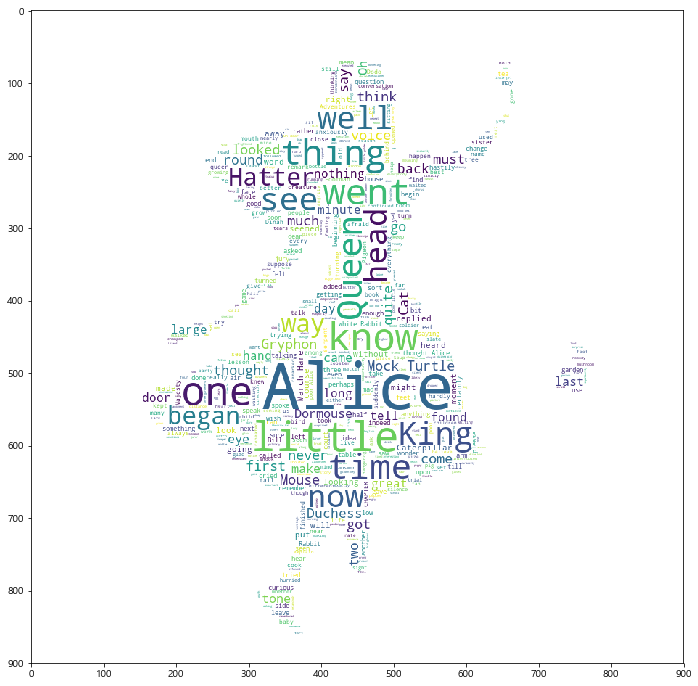

In [52]:
# 엘리스 그림 모양
plt.figure(figsize=(12,12))
plt.imshow(wc, cmap=plt.cm.gray)
plt.show()

- 점수(별점), 리뷰제목, 작성자 닉네임, 작성날짜, 리뷰내용
- 감정분석(VADER) - NLTK
- good+0.1 , awful -0.1, perfect+0.2
- 문장에서 저런 단어가 추출되면 나올 때마다 점수를 더하고 빼서 점수 긍정, 점수 부정

In [57]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize
import nltk

In [56]:
sid = SentimentIntensityAnalyzer()

In [122]:
score = []
title = []
writer = []
date = []
content = []
data =[]
for review in reivew_list:
    score.append(review.find_all('span')[0].get_text().replace('\n',''))
    title.append(review.find_all('a','title')[0].get_text().replace('\n',''))
    writer.append(review.find_all('span','display-name-link')[0].get_text())
    date.append(review.find_all('span','review-date')[0].get_text())
    content.append(review.find_all('div','text show-more__control')[0].get_text())


In [124]:
len(content)

25

In [135]:
score = []
title = []
writer = []
date = []
content = []
data =[]

In [136]:
sum_review=''
for review in reivew_list:
    score = review.find('span').get_text().replace('\n','')
    title = review.find('a').get_text().replace('\n','')
    writer = review.find('span',{'class':'display-name-link'}).get_text()
    date = review.find('span',{'class':'review-date'}).get_text()
    content = review.find('div',{'class':'text show-more__control'}).get_text()
    sum_review =sum_review + content
    
    lines_list =tokenize.sent_tokenize(content)
    sum = 0
    # polartiy_scores() : 문장을 단어별로 분석해서 긍정, 부정, 중립에 대한 점수를 계산해주고 종합 점수를 반환
    for sent in lines_list:
        ss = sid.polarity_scores(sent)
        sum = sum + ss['compound']
    sum1 = (sum/len(lines_list))
    
    data.append([score, title, writer, date, content, sum1])


In [147]:
with open('./service_imdb_wordcloud.csv','w',encoding='utf-8') as file:
    file.write('score, title, writer, date, content, sum \n')
    
    # data를 반복해서 저장
    for idx in data:
        file.write("{},{},{},{},{},{} \n".format(idx[0],idx[1],idx[2],idx[3],idx[4],idx[5]))

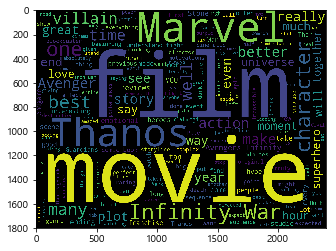

In [158]:
wordcloud = WordCloud(width=2400,height=1800,stopwords=set(STOPWORDS)).generate(sum_review)
plt.imshow(wordcloud)
plt.show()

In [160]:
import pandas as pd

df = pd.DataFrame(data)
df.columns = ['score', 'title', 'writer', 'date', 'content', 'sum']
df.to_csv('./service_imdb_wordcloud.csv')